In [70]:
import librosa
import librosa.display as lplt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_palette("gist_ncar")


HOP_LENGTH = 512


def visualize_feature(
    feature, sr, title, y_label, specshow=False, y_axis="linear", c_label=""
):
    plt.figure(figsize=(12, 4))
    if specshow:
        lplt.specshow(
            feature, sr=sr, hop_length=HOP_LENGTH, x_axis="time", y_axis=y_axis
        )
        plt.colorbar(label=c_label)
    else:
        times = librosa.times_like(feature, sr=sr, hop_length=HOP_LENGTH)
        if feature.ndim == 1:
            feature = feature.reshape(1, -1)
        df = pd.DataFrame(feature.T, index=times)
        sns.lineplot(data=df, legend=False)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()


y, sr = librosa.load("../data/genres/blues/blues.00000.wav")

[[0.3311254  0.23492369 0.87141633 ... 0.15691069 0.87786233 1.        ]
 [0.39392966 0.29400358 0.688265   ... 0.13222213 0.6850758  0.72816867]
 [0.42932424 0.41955495 0.5160273  ... 0.25044867 0.56496435 0.4033989 ]
 ...
 [1.         1.         1.         ... 0.2619949  0.95514876 0.8657351 ]
 [0.42033255 0.36797968 0.6217583  ... 1.         1.         0.98580545]
 [0.30348283 0.19700052 0.64925486 ... 0.628761   0.7172243  0.81626576]]


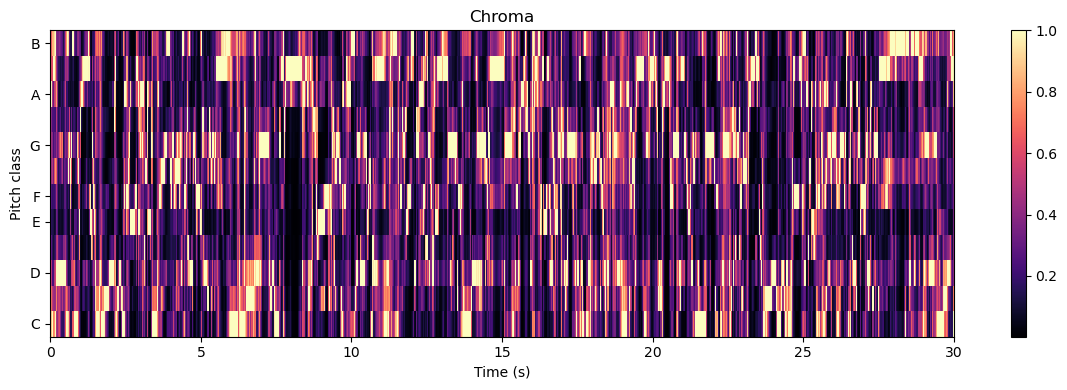

In [64]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
print(chroma)
visualize_feature(chroma, sr, "Chroma", "Pitch Class", specshow=True, y_axis="chroma")

[[-240.63542    -211.21436    -193.90889    ... -109.999146
   -86.81443     -84.07359   ]
 [  99.647644    101.04283     102.24396    ...  150.07935
   138.94867     138.30978   ]
 [  -7.4032764    -8.358527      1.9154345  ...  -50.795135
   -36.53614     -28.136354  ]
 ...
 [   9.741491      6.3694696     3.650023   ...   -2.857155
    -6.2137356    -0.49143204]
 [   3.590871      4.050848      4.788999   ...   -7.574689
    -8.44672      -6.7805667 ]
 [   5.3480153     3.2318459     0.9402475  ...   -7.5553374
     0.30611193    3.5234954 ]]


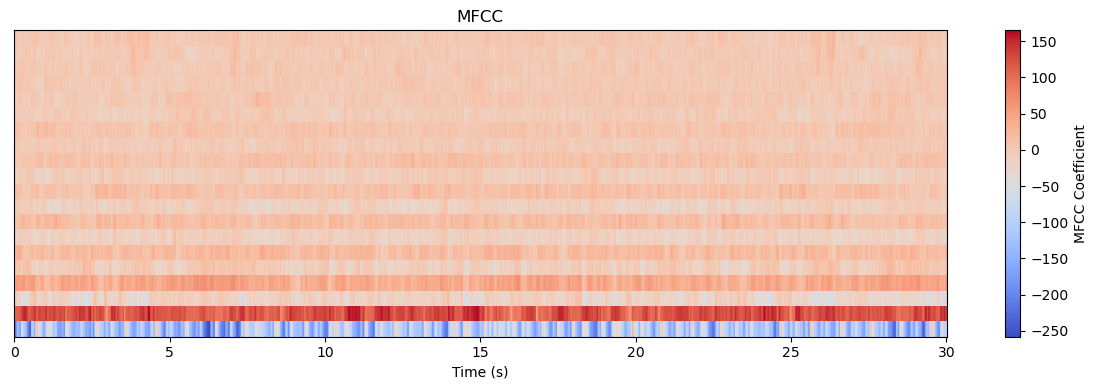

In [71]:
# MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr)
print(mfcc)
visualize_feature(
    mfcc, sr, "MFCC", "", specshow=True, y_axis=None, c_label="MFCC Coefficient"
)

[0.01908039 0.03683019 0.0497628  ... 0.1405525  0.12789187 0.11043249]


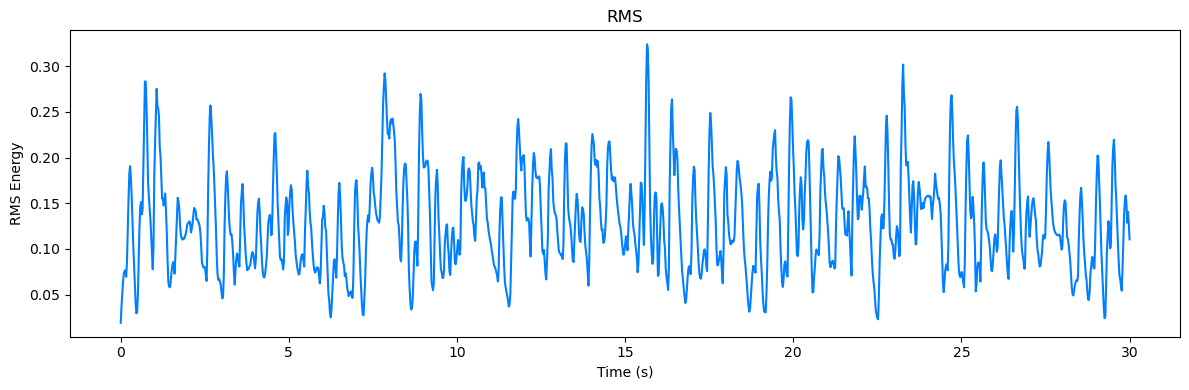

In [87]:
rms = librosa.feature.rms(y=y).flatten()
print(rms)
visualize_feature(rms, sr, "RMS", "RMS Energy", y_axis=None)

[2283.08439586 2247.35232093 2308.61530251 ... 1515.84393596 1735.2594234
 1764.34080935]


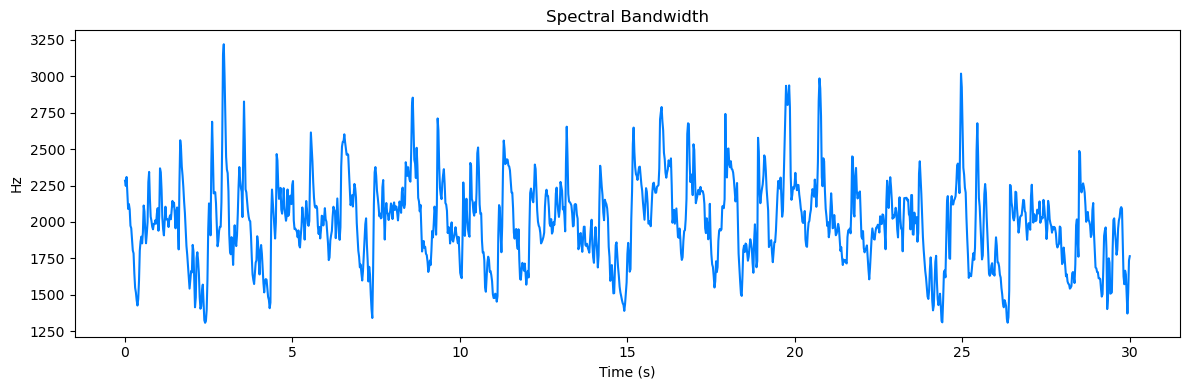

In [88]:
# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).flatten()
print(spectral_bandwidth)
visualize_feature(spectral_bandwidth, sr, "Spectral Bandwidth", "Hz")

[2122.97749428 2102.62106711 1955.28567059 ... 1490.45683883 1507.40420474
 1439.64315882]


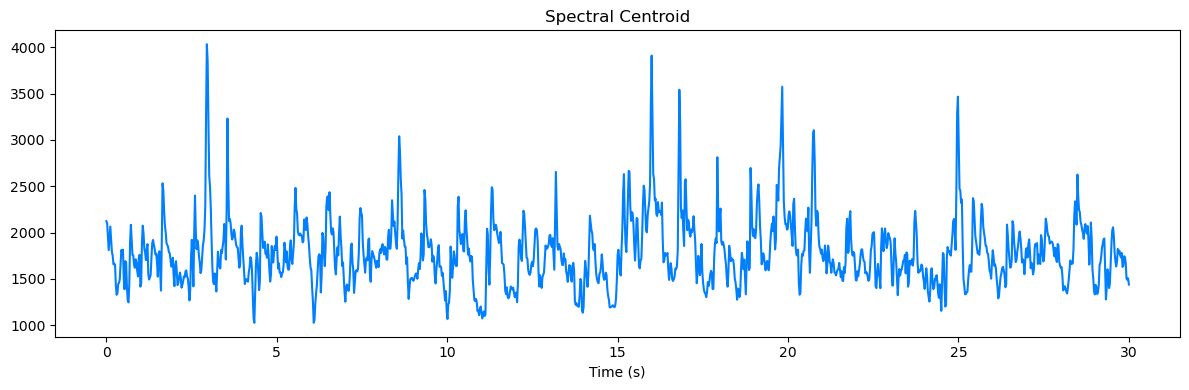

In [62]:
# Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).flatten()
print(spectral_centroid)
visualize_feature(spectral_centroid, sr, "Spectral Centroid", "Hz")

[[ 8.88813143 12.94743439 14.04482123 ...  8.71978953 22.02029234
   6.55831192]
 [ 8.68720863 13.14769924 11.47699751 ... 15.5189989  12.35417063
   8.53709406]
 [11.26355537 11.62828675 12.68180485 ... 16.83401665 14.57886506
  15.00990032]
 ...
 [19.44278783 20.63529115 21.34808186 ... 19.81658966 17.30494089
  16.03606406]
 [16.83635626 15.50385806 13.04148532 ... 18.08097152 17.08628646
  16.40420758]
 [29.60099032 36.08262589 37.28092353 ... 37.72795104 25.32631392
  15.65901981]]


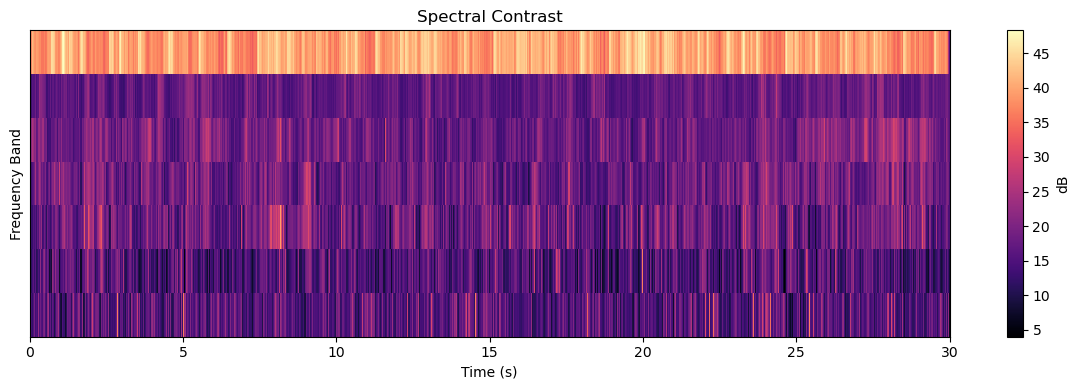

In [72]:
# Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
print(spectral_contrast)
visualize_feature(
    spectral_contrast,
    sr,
    "Spectral Contrast",
    "Frequency Band",
    specshow=True,
    y_axis=None,
    c_label="dB",
)

[0.0145618  0.01049567 0.00578466 ... 0.00196063 0.00379042 0.00546285]


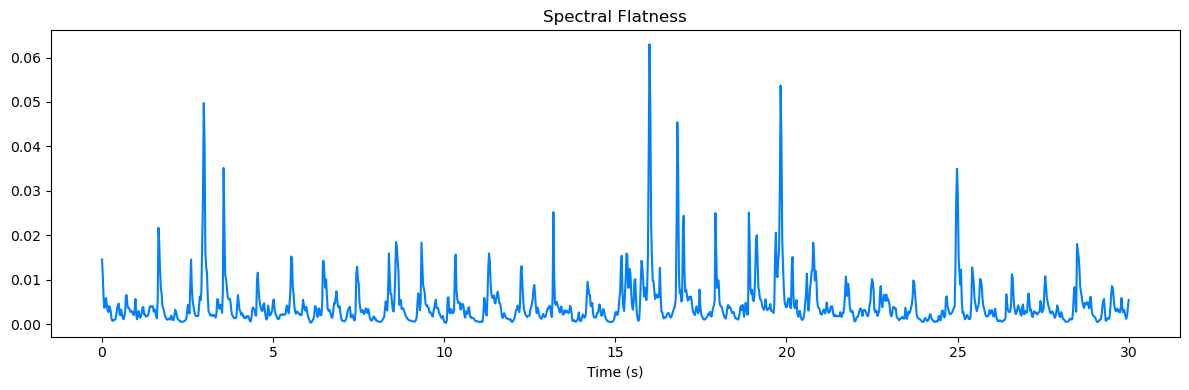

In [73]:
# Spectral Flatness
spectral_flatness = librosa.feature.spectral_flatness(y=y).flatten()
print(spectral_flatness)
visualize_feature(spectral_flatness, sr, "Spectral Flatness", "")

[4705.00488281 4640.40527344 4715.77148438 ... 2616.28417969 3003.88183594
 2939.28222656]


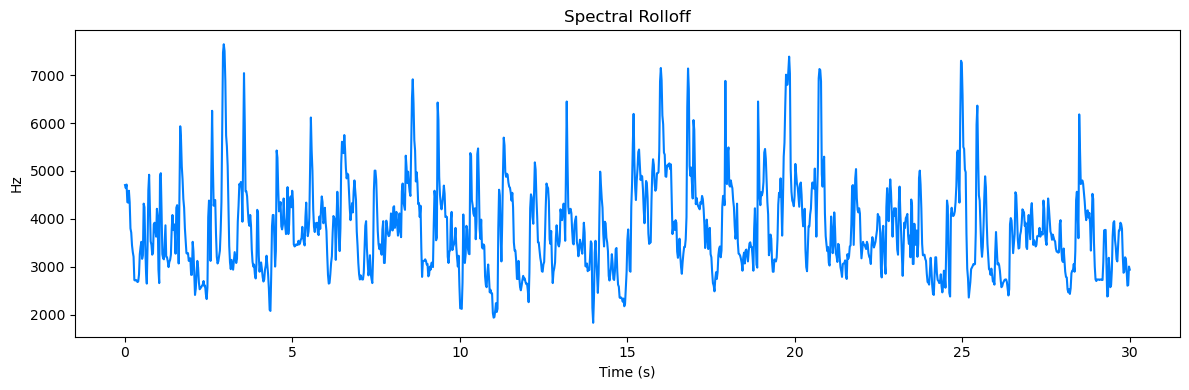

In [74]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).flatten()
print(spectral_rolloff)
visualize_feature(spectral_rolloff, sr, "Spectral Rolloff", "Hz")

[[ 0.08404951  0.09491699  0.08768757 ... -0.00513591  0.01875772
   0.02488327]
 [-0.0578563  -0.0663598  -0.0689255  ...  0.0478473   0.02326195
   0.00221386]
 [ 0.12729049  0.13689646  0.14162281 ... -0.04965466 -0.04074548
  -0.03176067]
 [ 0.02308802  0.01294518  0.01017171 ... -0.05590155  0.00051153
   0.02311114]
 [-0.03106204 -0.03565122 -0.04424555 ...  0.01507097  0.00676712
   0.00762892]
 [-0.02184351 -0.01971144 -0.01617931 ... -0.00775336  0.00442953
   0.0160449 ]]


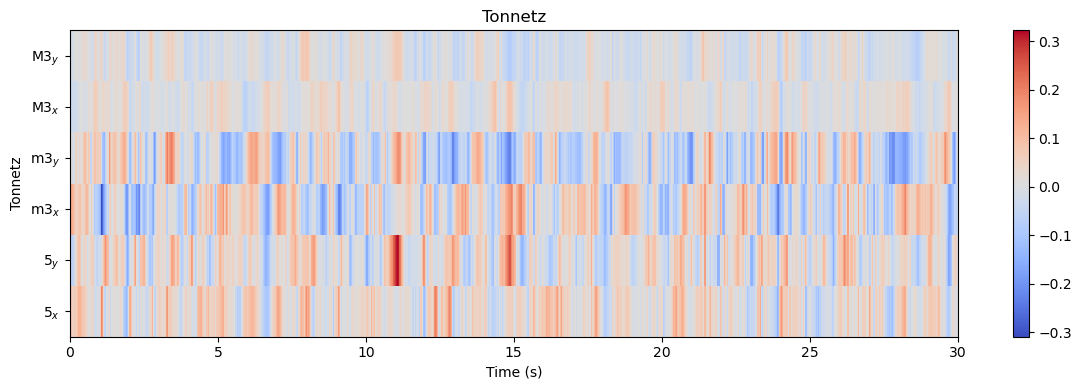

In [81]:
# Tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
print(tonnetz)
visualize_feature(tonnetz, sr, "Tonnetz", "Tonnetz", specshow=True, y_axis="tonnetz")

[0.06494141 0.08300781 0.10791016 ... 0.08642578 0.06933594 0.04589844]


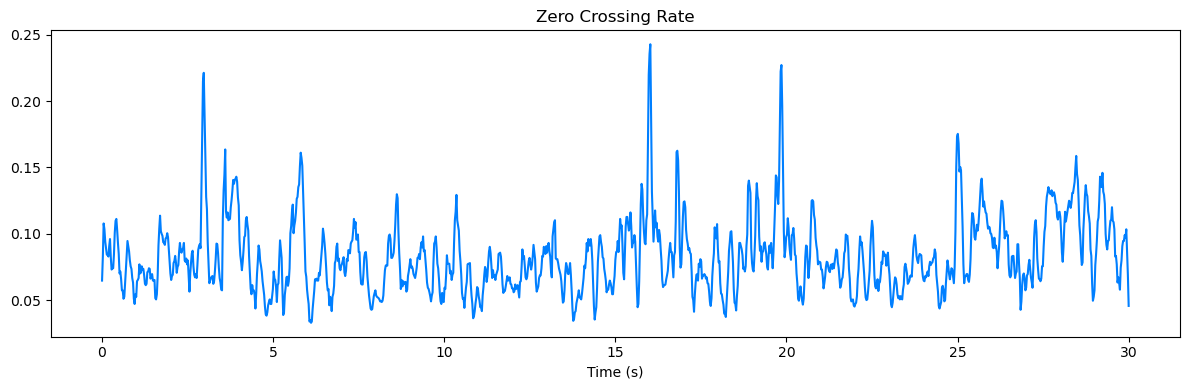

In [82]:
# Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y).flatten()
print(zero_crossing_rate)
visualize_feature(zero_crossing_rate, sr, "Zero Crossing Rate", "")

In [83]:
# Tempo
tempo = librosa.feature.tempo(y=y, sr=sr)
print(tempo)

[123.046875]
